In [5]:
import time
import numpy as np
from scipy.spatial import distance

#topological data analysis
from ripser import ripser
from persim import plot_diagrams

#plotting and visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.patches import Circle

import matplotlib.pyplot as plt
%matplotlib inline

import math
import cmath
from definitions import pentagon

import random
# import numpy as np

#manifold learning and dim red
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding as LLE

#topological data analysis
# from ripser import ripser
# from persim import plot_diagrams
# from dreimac import CircularCoords, CircleMapUtils

#plotting and visualization
# from jupyter_dash import JupyterDash
# from dash import Dash, dcc, html, Input, Output, no_update
import plotly.graph_objects as go
import pandas as pd
import base64

from matplotlib import cm
# import matplotlib.pyplot as plt
# %matplotlib inline


def plot_barcodes(diagrams, alpha_max, width = 1.5):
    max_dim = len(diagrams)
    fig, axs = plt.subplots(max_dim)
    fig.suptitle('Barcodes')
    for dim in range(max_dim):
        barcode = np.copy(diagrams[dim])
        ind_inf = np.isinf(barcode.T[1])
        barcode[ind_inf, 1] = alpha_max
        h = 1
        for i in range(len(barcode)):
            x = barcode[i]
            y = [h,h]
            axs[dim].plot(x, y, linestyle= '-', c='#1f77b4', linewidth = width)
            if ind_inf[i]:
                axs[dim].scatter([alpha_max],[h],  s=10, marker='>', c='#1f77b4')
            h += 1
        axs[dim].set_xlim(0, 1.05*alpha_max)
        axs[dim].set_ylim(0,h)
        axs[dim].get_yaxis().set_ticks([]);
        axs[dim].spines['right'].set_color('none')
        axs[dim].spines['top'].set_color('none')
        axs[dim].text(0.3,1,'$\mathrm{bcd}^{\mathcal{R}}_{'+str(dim)+'}(X)$', verticalalignment='bottom')

In [14]:
# upload the excel files using pandas

# data = pentagon((math.pi)/3, (math.pi)/3, [1,1,1,1])
# # print(data)
# # complex_data = []
# rearr_data = []
# # print(len(data))
# for i in range(4):
# #     complex_data.append([complex(data[i][0][0], data[i][0][1]), complex(data[i][1][0], data[i][1][1]), complex(data[i][2][0], data[i][2][1]), complex(data[i][3][0], data[i][3][1]), complex(data[i][4][0], data[i][4][1])])
#     rearr_data.append([(data[i][0][0], data[i][0][1]), (data[i][1][0], data[i][1][1]), (data[i][2][0], data[i][2][1]), (data[i][3][0], data[i][3][1]), (data[i][4][0], data[i][4][1])])
# # print(data)
# # complex_data = np.array(complex_data)
# rearr_data = np.array(rearr_data)

penta1 = np.loadtxt('sphere clean.txt', delimiter=',')
penta2 = np.loadtxt('genus 3 clean.txt', delimiter=',')

print(penta1.shape)


(399, 10)


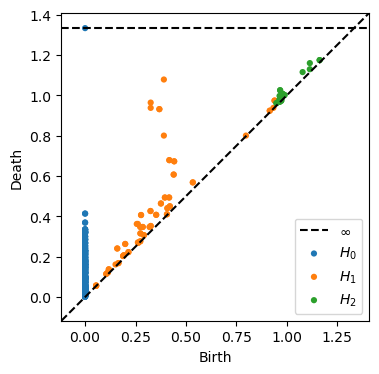

In [18]:
#Using Ripser, we will find the persistence diagrams
#Here I am referecing code from Demo 6 in Day 5 DREimac

# Persistence Computation
# print(data.shape)

n_land = 300
res = ripser(penta1, maxdim=2, coeff =13, thresh = 1.8)
dgms = res['dgms']
plt.figure(figsize = (4,4)) 
plot_diagrams(dgms)


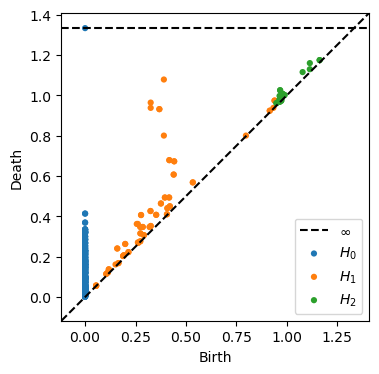

In [19]:

n_land = 300
res = ripser(penta2, maxdim=2, coeff =13, thresh = 1.8)
dgms = res['dgms']
plt.figure(figsize = (4,4)) 
plot_diagrams(dgms)